### **Polynomial Regression**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y dataset')

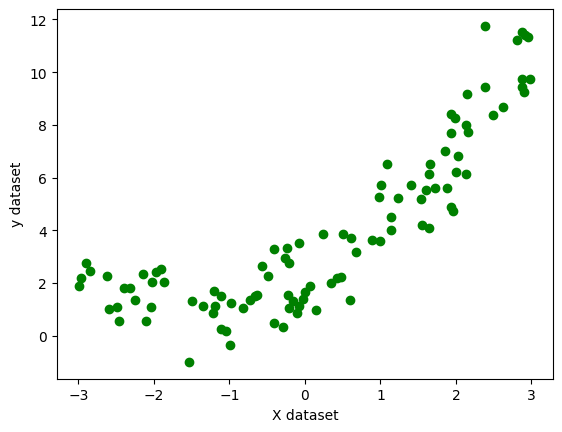

In [5]:
# create a custome dataset using numpy
X = 6*np.random.rand(100,1) - 3 # random 100 numbers with some outliers
y = 0.5*X**2 + 1.5*X + 2 + np.random.randn(100,1)

plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')
# quadratic eqn used here: y = 0.5*X^2 + 1.5X + 2 + noise

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
# implement simple linear regression for comparision
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [8]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
score = r2_score(y_test,lin_reg.predict(X_test))
print(score)

0.7662439128042062


Text(0, 0.5, 'y dataset')

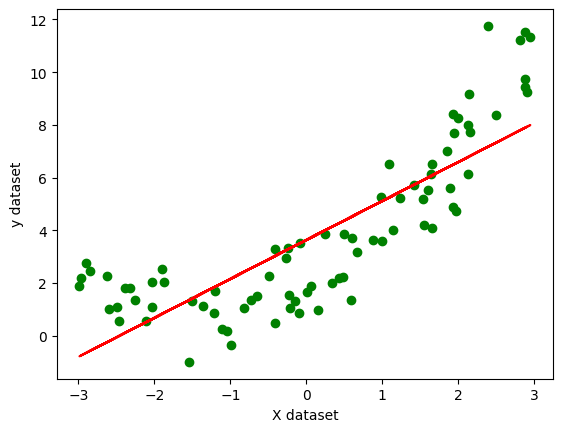

In [13]:
# visulaize the linear regression model
plt.plot(X_train, lin_reg.predict(X_train), color='r')
plt.scatter(X_train, y_train, color='g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [14]:
# apply polynomial tranformation
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=True) # take 1 x x^2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
X_train_poly

array([[ 1.00000000e+00,  1.96333404e+00,  3.85468056e+00],
       [ 1.00000000e+00, -2.30089424e-01,  5.29411428e-02],
       [ 1.00000000e+00,  2.81320057e+00,  7.91409742e+00],
       [ 1.00000000e+00,  2.14036271e+00,  4.58115251e+00],
       [ 1.00000000e+00,  1.99155734e+00,  3.96630064e+00],
       [ 1.00000000e+00,  1.53289638e+00,  2.34977133e+00],
       [ 1.00000000e+00,  1.93196546e+00,  3.73249053e+00],
       [ 1.00000000e+00,  1.41065931e+00,  1.98995968e+00],
       [ 1.00000000e+00,  1.65347093e+00,  2.73396613e+00],
       [ 1.00000000e+00,  2.38742832e+00,  5.69981399e+00],
       [ 1.00000000e+00,  1.93626302e+00,  3.74911448e+00],
       [ 1.00000000e+00,  1.64759721e+00,  2.71457655e+00],
       [ 1.00000000e+00, -2.59229616e+00,  6.71999940e+00],
       [ 1.00000000e+00, -4.10849200e-01,  1.68797065e-01],
       [ 1.00000000e+00, -4.07380966e-01,  1.65959251e-01],
       [ 1.00000000e+00,  1.08339877e+00,  1.17375290e+00],
       [ 1.00000000e+00,  2.90718204e+00

In [17]:
X_test_poly

array([[ 1.00000000e+00, -2.12729503e-02,  4.52538413e-04],
       [ 1.00000000e+00, -7.35107717e-02,  5.40383356e-03],
       [ 1.00000000e+00,  2.91181652e+00,  8.47867543e+00],
       [ 1.00000000e+00,  2.00102599e+00,  4.00410500e+00],
       [ 1.00000000e+00, -2.13680934e+00,  4.56595418e+00],
       [ 1.00000000e+00, -2.90379442e-01,  8.43202204e-02],
       [ 1.00000000e+00, -1.19005639e+00,  1.41623421e+00],
       [ 1.00000000e+00,  1.00227435e+00,  1.00455388e+00],
       [ 1.00000000e+00, -5.66195392e-01,  3.20577222e-01],
       [ 1.00000000e+00,  2.03173558e+00,  4.12794947e+00],
       [ 1.00000000e+00, -6.34622238e-01,  4.02745385e-01],
       [ 1.00000000e+00,  2.62448512e+00,  6.88792212e+00],
       [ 1.00000000e+00,  1.14129206e+00,  1.30254756e+00],
       [ 1.00000000e+00, -1.11483426e+00,  1.24285542e+00],
       [ 1.00000000e+00, -2.04541303e-01,  4.18371445e-02],
       [ 1.00000000e+00, -9.77425820e-01,  9.55361233e-01],
       [ 1.00000000e+00,  2.38577742e+00

In [18]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)

y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score) # now we get a better score

0.9265844565542416


In [19]:
print(regression.coef_, regression.intercept_) # get the coefficients and intercept

[[0.         1.47846317 0.51854214]] [2.05094958]


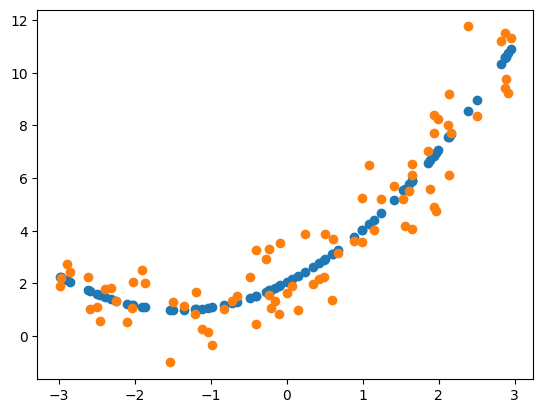

In [21]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [24]:
# prediction of new data
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

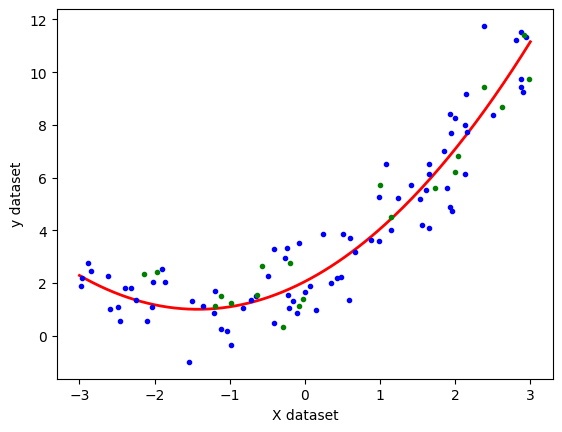

In [25]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training data")
plt.plot(X_test, y_test, "g.", label="Testing data")
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.show()